# Imports

In [17]:
import pandas as pd; import seaborn as sb; import os; from analysis_helpers import *; 
import scipy; from scipy import stats; import os; import math; import scipy; import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Verify screen size recording and data loading

In [18]:
# load in my sample gaze data
os.listdir('/Users/kirstenziman/Downloads/gaze_check/')
data = eye_intial('/Users/kirstenziman/Downloads/gaze_check/')

In [19]:
# convert the data from pixels to centimeters
data['av_x_coord'] = (59.8/2048)*(data[['xRaw_righteye', 'xRaw_lefteye']].mean(axis=1))
data['av_y_coord'] = (33.6/1152)*(data[['yRaw_righteye', 'yRaw_lefteye']].mean(axis=1))

In [20]:
data.head(n=3)

,avg,fix,lefteye,raw,righteye,state,time,timestamp,xRaw_righteye,yRaw_righteye,xRaw_lefteye,yRaw_lefteye,av_x_coord,av_y_coord
0,"{'x': 939.3611, 'y': 457.5251}",True,"{'avg': {'x': 927.8934, 'y': 443.9596}, 'pcent...","{'x': 951.3698, 'y': 447.8226}","{'avg': {'x': 953.4265, 'y': 462.3258}, 'pcent...",7,429493864,1.567019e+09,972.7897,474.4641,929.9497,421.1812,27.779252,13.061494
1,"{'x': 940.4221, 'y': 457.7624}",True,"{'avg': {'x': 928.1437, 'y': 444.6928}, 'pcent...","{'x': 963.4797, 'y': 446.7427}","{'avg': {'x': 956.7319, 'y': 460.6899}, 'pcent...",7,429493898,1.567019e+09,995.6876,438.3039,931.2719,455.1814,28.132856,13.029994
2,"{'x': 942.6556, 'y': 454.9428}",True,"{'avg': {'x': 0.0, 'y': 0.0}, 'pcenter': {'x':...","{'x': 634.8389, 'y': 573.4175}","{'avg': {'x': 634.8389, 'y': 573.4175}, 'pcent...",7,429494085,1.567019e+09,634.8389,573.4175,0.0000,0.0000,9.268400,8.362339


# CHECK 1: Screen size verification

In this check, I verify that we are collecting gaze data from the entirety of the screen by calibrating the eye tracker on myself, then moving my eyes around the periphery of the screen (staying within the screen boundary). We can see that we are recording from the full screen, not just a subselection. As such, the smaller screen size (2048, 1152) selected by the eyetribe software is not limiting our area of data collection to a subsection of the sceen. It may, however, give a reduced resolution.

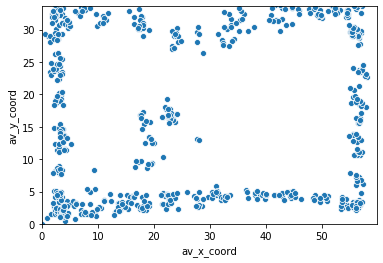

In [21]:
%matplotlib inline
sb.scatterplot(x='av_x_coord', y='av_y_coord', data=data)
plt.ylim(0, 33.6)
plt.xlim(0, 59.8)
plt.show()

# Check 3: Verify that compiled gaze data from stimulus presentation periods is properly labeled subject, run, and trial number

In [22]:
# load gaze data
whole_exp1_gaze = pd.read_csv('../parsed_data/gaze_data_sustained.csv')
whole_exp2_gaze = pd.read_csv('../parsed_data/gaze_data_variable.csv')

# load behavioral data
exp1 = pd.read_csv('../parsed_data/behavioral_data_sustained.csv')
exp2 = pd.read_csv('../parsed_data/behavioral_data_variable.csv')

# label rows by trial number
for exp in [exp1, exp2]:

    # Number all presentation and memory trials 
    exp.loc[exp['Trial Type']=='Memory','Trial'] = list(range(0,40))*30*8
    exp.loc[exp['Trial Type']=='Presentation','Trial'] = list(range(0,10))*30*8

### Here, I select some arbitrary presentation trials from arbitrary subjects and make sure that the minimum and maximum timepoints of the gaze data associated with those trials is within the stimulus onset and offset times recorded in the behavioral csv (see images attached to github issue in comments)

In [23]:
gaze_times

,Unnamed: 0,avg,fix,lefteye,raw,righteye,state,time,timestamp,xRaw_righteye,yRaw_righteye,xRaw_lefteye,yRaw_lefteye,av_x_coord,av_y_coord,Subject,Run,Trial
31631,35499,"{'x': 1283.8533, 'y': 620.2024}",False,"{'avg': {'x': 1242.6743, 'y': 640.9823}, 'pcen...","{'x': 1264.1882, 'y': 619.1492}","{'avg': {'x': 1312.2472, 'y': 601.8237}, 'pcen...",7,32619412,1.539778e+09,1300.6136,604.0792,1227.7628,634.2191,36.913308,18.058517,24,0,0
31632,35500,"{'x': 1282.3907, 'y': 621.6744}",False,"{'avg': {'x': 980.8429, 'y': 663.775}, 'pcente...","{'x': 1018.4906, 'y': 644.8041}","{'avg': {'x': 1056.1383, 'y': 625.8331}, 'pcen...",7,32619445,1.539778e+09,1056.1383,625.8331,980.8429,663.7750,29.739130,18.806785,24,0,0
31633,35501,"{'x': 1016.6923, 'y': 647.6729}",False,"{'avg': {'x': 979.5422, 'y': 645.1591}, 'pcent...","{'x': 1016.6923, 'y': 647.6729}","{'avg': {'x': 1053.8423, 'y': 650.1867}, 'pcen...",7,32619479,1.539778e+09,1053.8423,650.1867,979.5422,645.1591,29.686619,18.890460,24,0,0
31634,35502,"{'x': 1017.2625, 'y': 648.6044}",False,"{'avg': {'x': 978.2921, 'y': 652.2047}, 'pcent...","{'x': 1017.8312, 'y': 649.5336}","{'avg': {'x': 1056.2328, 'y': 645.0042}, 'pcen...",7,32619522,1.539778e+09,1058.6173,639.8348,977.0451,659.2324,29.719876,18.944730,24,0,0
31635,35503,"{'x': 1020.4211, 'y': 648.7958}",False,"{'avg': {'x': 981.9686, 'y': 652.1607}, 'pcent...","{'x': 1018.9575, 'y': 651.0502}","{'avg': {'x': 1053.6932, 'y': 646.6888}, 'pcen...",7,32619556,1.539778e+09,1048.6339,650.0627,989.2811,652.0377,29.752763,18.988964,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31704,35572,"{'x': 1290.6523, 'y': 663.8296}",True,"{'avg': {'x': 1239.0342, 'y': 711.8994}, 'pcen...","{'x': 1141.3282, 'y': 640.7992}","{'avg': {'x': 1319.0265, 'y': 649.7735}, 'pcen...",7,32622224,1.539778e+09,1182.9049,620.5125,1099.7516,661.0859,33.325893,18.689977,24,0,0
31705,35573,"{'x': 1285.1926, 'y': 664.3483}",True,"{'avg': {'x': 1228.6156, 'y': 709.4122}, 'pcen...","{'x': 1132.5037, 'y': 626.8036}","{'avg': {'x': 1308.7322, 'y': 647.7524}, 'pcen...",7,32622258,1.539778e+09,1172.9867,607.1700,1092.0208,646.4372,33.068225,18.281772,24,0,0
31706,35574,"{'x': 1281.0177, 'y': 667.9522}",True,"{'avg': {'x': 1219.8298, 'y': 707.6819}, 'pcen...","{'x': 1141.9536, 'y': 635.9633}","{'avg': {'x': 1298.3909, 'y': 645.6387}, 'pcen...",7,32622301,1.539778e+09,1172.2310,605.4139,1111.6761,666.5126,33.344152,18.548928,24,0,0
31707,35575,"{'x': 1278.7561, 'y': 669.2726}",True,"{'avg': {'x': 1210.3258, 'y': 705.7842}, 'pcen...","{'x': 1137.7285, 'y': 640.5206}","{'avg': {'x': 1288.731, 'y': 644.3336}, 'pcent...",7,32622334,1.539778e+09,1177.3082,617.1078,1098.1487,663.9335,33.220782,18.681852,24,0,0


In [24]:
import random
for sub in random.sample(list(whole_exp1_gaze['Subject'].unique()),2):
    for run in random.sample(list(whole_exp1_gaze['Run'].unique()),2):
        for trial in random.sample(list(whole_exp1_gaze['Trial'].unique()),2):
    
            gaze_times = whole_exp1_gaze[(whole_exp1_gaze['Subject']==sub) 
                                        &(whole_exp1_gaze['Run']==run)
                                        &(whole_exp1_gaze['Trial']==trial)]
            
            pres_times = exp1[(exp1['Subject']==sub) 
                                &(exp1['Run']==run)
                                &(exp1['Trial']==trial)
                                &(exp1['Trial Type']=='Presentation')]
            
            print('The behavioral file indicates images were presented from '+str(pres_times['Stimulus Onset'].item())+' to '+str(pres_times['Stimulus End'].item()))
            print('The first associated gazepoint is at time '+str(gaze_times['timestamp'].min())+' and the last is at time '+str(gaze_times['timestamp'].max()))
            print()
            

        
    print(sub)


The behavioral file indicates images were presented from 1539187836.052003 to 1539187839.318868
The first associated gazepoint is at time 1539187836.0579998 and the last is at time 1539187839.274

The behavioral file indicates images were presented from 1539187876.9810288 to 1539187880.398963
The first associated gazepoint is at time 1539187876.9929998 and the last is at time 1539187880.3979998

The behavioral file indicates images were presented from 1539185287.04452 to 1539185290.380151
The first associated gazepoint is at time 1539185287.06 and the last is at time 1539185290.36

The behavioral file indicates images were presented from 1539185255.635087 to 1539185259.002909
The first associated gazepoint is at time 1539185255.6379998 and the last is at time 1539185257.3479998

14
The behavioral file indicates images were presented from 1538572094.023438 to 1538572097.308028
The first associated gazepoint is at time 1538572094.042 and the last is at time 1538572097.081

The behavioral

# Check 2 : screen boundary cutoff

Load data that is only partially pre processed (saved out after running cell #### in analyze_gaze_data.ipynb). This data still includes extreme gazepoint values outside the size of our screen, so we can explore how many fall very close to the scrren boundary.

In [25]:
# exp1_sub_gaze = pd.read_csv('/Users/kirstenziman/Documents/NEW_DIRECTORY/exp1_sub_gaze_intermediary.csv')
pres_full = pd.read_csv('presentation_with_gaze_outside_screen.csv')

In [26]:
# verify extreme values are still intact
print(pres_full['av_x_coord'].min())
print(pres_full['av_x_coord'].max())
print()
print(pres_full['av_y_coord'].min())
print(pres_full['av_y_coord'].max())

2.2201500000000003
1084285.722

-44443.29035
62048.0975


In [27]:
# convert from pixels to centimeters
pres_full['av_x_coord'] = (59.8/2048)*(pres_full[['xRaw_righteye', 'xRaw_lefteye']].mean(axis=1))
pres_full['av_y_coord'] = (33.6/1152)*(pres_full[['yRaw_righteye', 'yRaw_lefteye']].mean(axis=1))

In [28]:
# sum the number of gazepoints falling within half a centimeter outside the screen periphery
x_bound = pres_full[((pres_full['av_x_coord'].between(-.5,0)) | (pres_full['av_x_coord'].between(59.8,60.3))) & ((pres_full['av_y_coord'].between(-.5,34.1)))]
y_bound = pres_full[((pres_full['av_y_coord'].between(-.5,0)) | (pres_full['av_y_coord'].between(33.6,34.1))) & ((pres_full['av_x_coord'].between(0,59.8)))]                       
                       
edges = pd.concat([x_bound, y_bound])
print(edges.shape[0])          

31


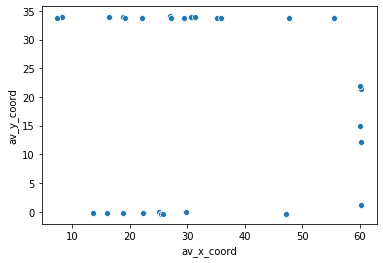

In [29]:
sb.scatterplot(x='av_x_coord', y='av_y_coord', data=edges)

In [30]:
print('Total number of gazepoints collected across the entire experiment: '+ str(edges.shape[0]))

Total number of gazepoints collected across the entire experiment: 31


### Obtain proportion of gazepoints falling .5 centimeters or less outside the screen's edge

Note: this rough look at the data will actually overestimate the number of gazepoints falling immediately next to the screen 

In [31]:
print('Proportion of gazepoints falling .5 centimeters or less outside of the screen periphery: '+str(edges.shape[0]/pres_full.shape[0]))

Proportion of gazepoints falling .5 centimeters or less outside of the screen periphery: 0.00018712687805967537


### Obtain proportion of gazepoints falling 1 centimeter or less outside the screen's edge

In [32]:
# sum the number of gazepoints falling within half a centimeter outside the screen periphery
x_bound = pres_full[((pres_full['av_x_coord'].between(-1,0)) | (pres_full['av_x_coord'].between(59.8,60.8))) & ((pres_full['av_y_coord'].between(-1,34.6)))]
y_bound = pres_full[((pres_full['av_y_coord'].between(-1,0)) | (pres_full['av_y_coord'].between(33.6,34.6))) & ((pres_full['av_x_coord'].between(0,59.8)))]                       
                       
edges = pd.concat([x_bound, y_bound])
print(edges.shape[0])   

54


In [33]:
print('Proportion of gazepoints falling 1 centimeter or less outside of the screen periphery: '+str(edges.shape[0]/pres_full.shape[0]))

Proportion of gazepoints falling 1 centimeter or less outside of the screen periphery: 0.0003259629488781442
